**Supervisor Agent**

In [3]:
from langchain_groq import ChatGroq
from langgraph_supervisor import create_supervisor
from langgraph.prebuilt import create_react_agent
import os
from dotenv import load_dotenv
from langchain_tavily import TavilySearch


In [7]:
load_dotenv()

llm = ChatGroq(
    temperature=0,  # Lower temperature for more factual responses
    groq_api_key=os.getenv("GROQ_API_KEY"),
    model_name="llama-3.3-70b-versatile"
)


In [ ]:
#create specialized agents
def add(a:float, b:float)-> float:
    '''Add two numbers'''
    return a+b

def web_search(query:str)->str:
    '''Search web information'''
    TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
    web_search = TavilySearch(max_results=3)
    web_search_results=web_search.invoke(query)
    return web_search_results["results"][0]["content"]

#create the first agent
math_agent=create_react_agent(
    model=llm,
    tools=[add],
    name="math_expert",
)

#create the research agent
research_agent=create_react_agent(
    model=llm,
    tools=[web_search],
    name="research_expert",
)

#create supervisor agent
workflow=create_supervisor(
    [research_agent, math_agent],
    model=llm,
)

#compile and run
app=workflow.compile()
result=app.invoke({
    "messages":[{
        "role":"user",
        "content":"What is the name of Name Gachagua's Party?"
    }]
})



TypeError: create_supervisor() got an unexpected keyword argument 'return_messages'

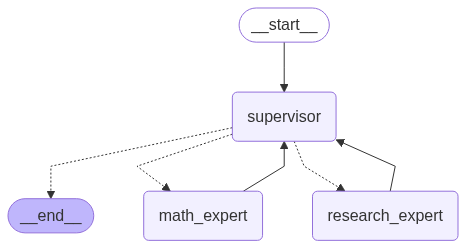

In [10]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))